<a href="https://colab.research.google.com/github/Nsquare1994/COT5600/blob/master/COT_5600_HW3_Q_EXP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

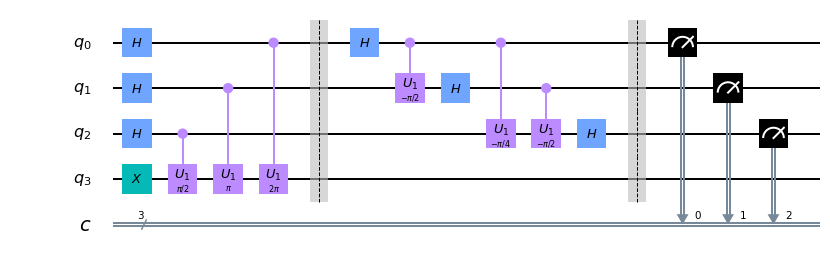

In [14]:
import qiskit
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.visualization import plot_histogram


theta = 2*np.pi*1/4
c = QuantumCircuit(4, 3)

def init(c, theta):
  for qubit in range(3):
    c.h(qubit)
  c.x(3)
  c.cu1(theta, 2, 3)
  c.cu1(theta*2, 1, 3)
  c.cu1(theta*4, 0, 3)
  
def inv_fourier_q(c, theta):
  c.barrier()
  c.h(0)
  c.cu1(-2*np.pi/4, 0, 1) 
  c.h(1)
  c.cu1(-2*np.pi/8, 0, 2) 
  c.cu1(-2*np.pi/4, 1, 2) 
  c.h(2)


init(c, theta)
inv_fourier_q(c, theta)
c.barrier()

for n in range(3):
  c.measure(n,n)

c.draw(output = 'mpl')




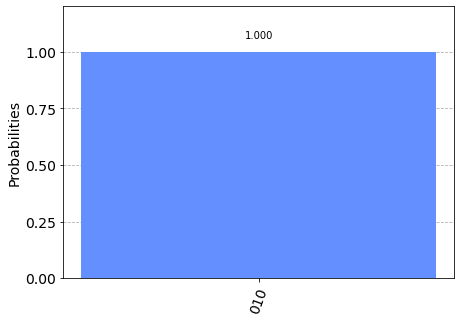

In [17]:
r = execute(c, backend=Aer.get_backend('qasm_simulator'),shots=4096).result().get_counts()

plot_histogram(r)